In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def double_well(x,a=0.1,b=1):
    return a*((x/b)**2-1)**2

def double_well_function(a=0.1):
    return lambda x: double_well(x, a=a)

def step(x,pot,dx=0.01):
    dx = np.random.choice([-1,1],len(x))*dx
    return x + (np.random.random(len(x))<np.exp(-pot(x+dx)+pot(x)))*dx

In [3]:
def do_sim(num_steps,num_traj,pot,xinit=0):
    x = np.ones((num_steps,num_traj))*xinit
    i_init = np.zeros(num_traj)
    mask = np.zeros(num_traj)
    jump_times = np.zeros(10*num_traj)
    num_jumps = 0
    for i in range(0,num_steps):
        x[i] = step(x[i-1],pot)
        mask = x[i] < 0
        jump_times[num_jumps:num_jumps+np.sum(mask)] = i - i_init[mask]
        x[i][mask]=xinit
        num_jumps += np.sum(mask)
        i_init[mask] = i
        if num_jumps>1000:
            break
    jump_times = jump_times[0:num_jumps]
    return x, jump_times   

def plot_sim(x):
    for j in range(0,x.shape[1]):
        plt.plot(x[:,j])

In [ ]:
x, jumps = do_sim(1000,1000,double_well_function(0.1),xinit=1)
plot_sim(x); plt.show();
plt.hist(jumps);

In [5]:
import multiprocessing as mp

In [7]:
%%time
a = np.linspace(1, 10, 10)
def do_do_sim(a):
	return do_sim(int(5000.*a**2.),1000,double_well_function(a))
jumps = [do_sim(int(5000.*i**2.),1000,double_well_function(i),xinit=1)[1] for i in a]
# jumps = mp.Pool(processes=4).map(do_do_sim, a) # takes too much memory
[len(j) for j in jumps]

CPU times: user 2min 15s, sys: 7.72 s, total: 2min 23s
Wall time: 2min 26s


[121, 411, 484, 453, 324, 231, 124, 69, 49, 18]

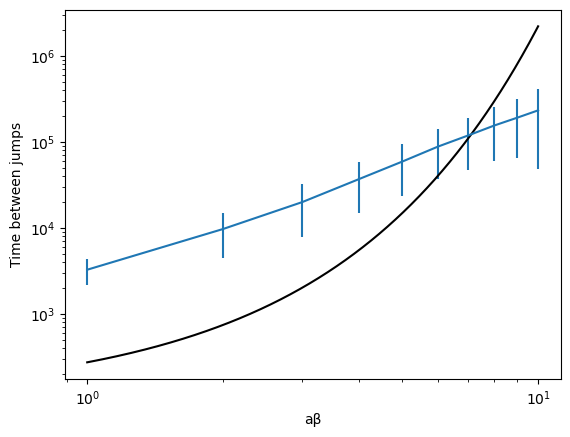

In [8]:
plt.errorbar(a, [np.mean(j) for j in jumps], [np.std(j) for j in jumps])
a_list = np.linspace(min(a), max(a), 1000)
plt.plot(
	a_list, 100*np.exp(a_list),
	color="black"
)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("aβ")
plt.ylabel("Time between jumps")
plt.show()

In [89]:
[np.mean(j) for j in jumps]

[3332.8796296296296,
 9719.961038961039,
 19663.67054263566,
 35678.901918976546,
 55841.31976744186,
 84756.66511627907,
 117161.4094488189,
 153036.15254237287,
 203234.67741935485,
 204949.42307692306]